In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [3]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [78]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Andrielly Pereira" --iversions

Author: Andrielly Pereira

matplotlib: 3.5.2
sklearn   : 1.0.2
numpy     : 1.21.5
pandas    : 1.4.4
seaborn   : 0.11.2



## Carregando o Conjunto de dados

In [6]:
# Carrega o dataset
dados = pd.read_csv('dados/dataset.csv')

In [7]:
# Shape
dados.shape

(500, 5)

In [8]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [9]:
# Amostra
dados.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
472,3.072076,31.268104,12.132509,35.456798,423.470533
422,3.772969,32.430839,13.887275,38.381956,557.608262
370,3.002957,33.369517,10.627949,38.040314,422.368737
483,3.393975,33.421212,10.706642,35.766154,438.303708
409,3.345922,33.556556,12.960307,37.951946,547.190749
253,3.974522,34.081646,12.104542,36.059646,548.518529
359,2.870987,32.848793,10.973162,36.609507,404.824529
325,1.809230,33.077731,11.466984,35.675728,374.269675
461,2.117383,34.278248,11.822722,36.308545,434.144202
343,2.898300,33.026420,13.186813,38.066930,489.908053


## Análise Exploratória de Dados

In [10]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [11]:
# Correlação (tabela)
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


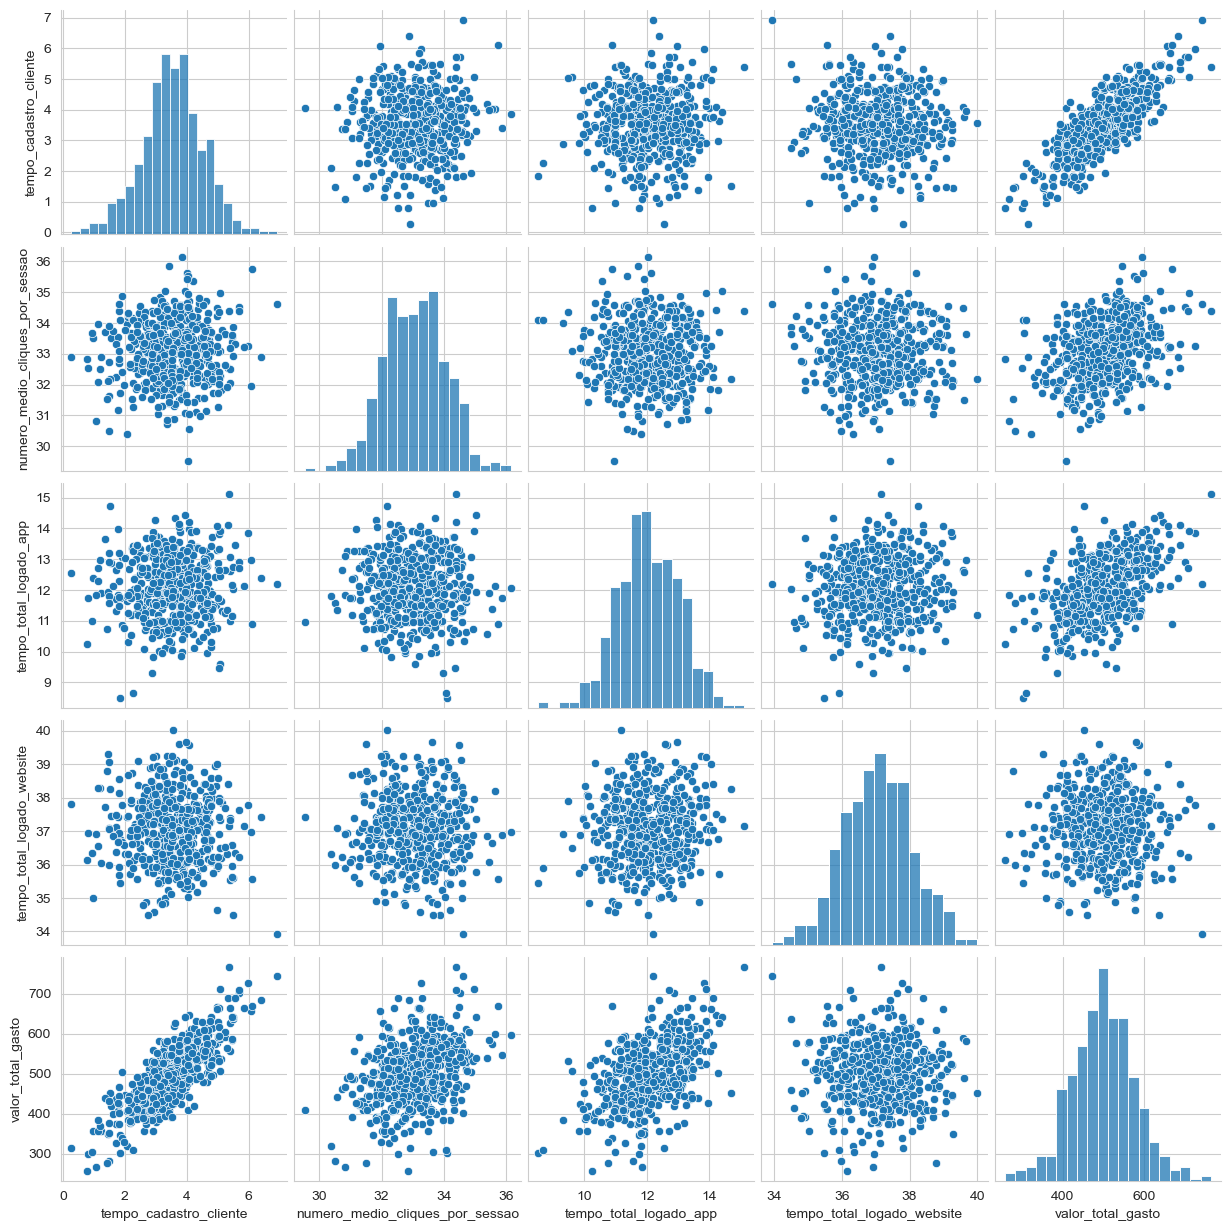

In [12]:
# Correlação (visual)
sns.pairplot(dados)

### Análise 1 - Relação Entre Tempo no Web Site e Valor Gasto

<Figure size 1800x1200 with 0 Axes>

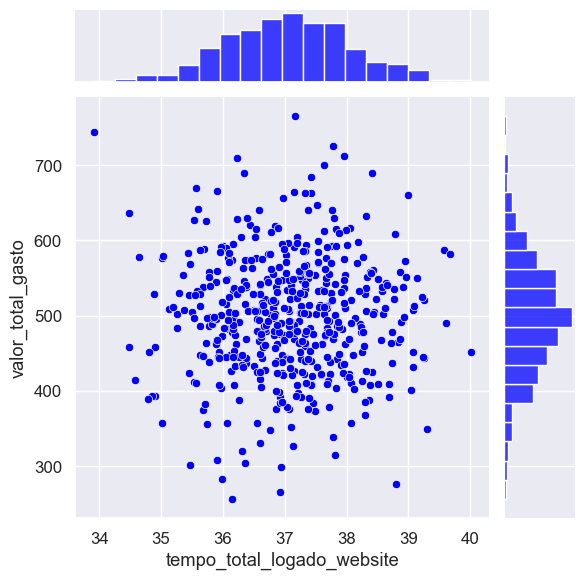

In [13]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_website', 
              y = 'valor_total_gasto',
              color = 'blue')

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [14]:
# Correlação
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


Não parece haver correlação entre o tempo logado no web site e o valor gasto pelos clientes.

### Análise 2 - Relação Entre Tempo na App e Valor Gasto

In [15]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

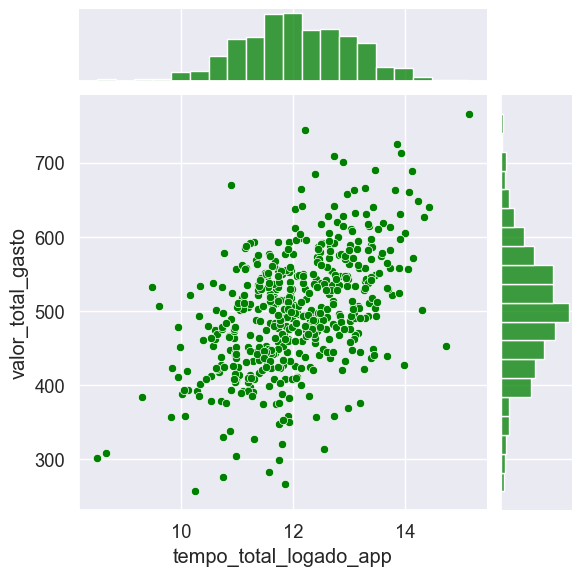

In [16]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_app', 
              y = 'valor_total_gasto', 
              color = 'green')

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

Observando o gráfico de dispersão, parece haver correlação positiva entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [17]:
# Correlação
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


Os dados têm uma correlação positiva moderada. Podemos deduzir que o valor total gasto mensalmente tende a aumentar se o cliente passar mais tempo logado na app.

### Análise 3 - Relação Entre Tempo na App e Tempo de Cadastro

In [18]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

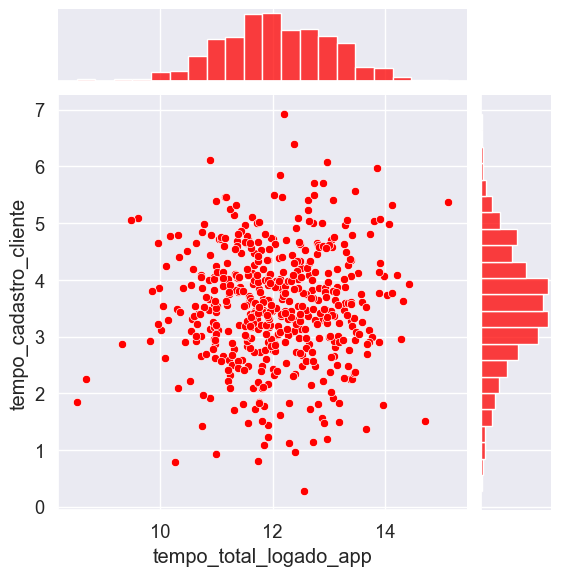

In [19]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_app', 
              y = 'tempo_cadastro_cliente', 
              color = 'red')

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

A partir do gráfico de dispersão podemos ver que os dados são muito densos no meio do gráfico, não havendo uma correlação clara. Podemos deduzir que existem muitos clientes que são membros há 3-4 anos e gastam aproximadamente 11,5 a 12,5 minutos na app.

### Análise 4 - Relação Entre Tempo de Cadastro e Valor Gasto

In [20]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

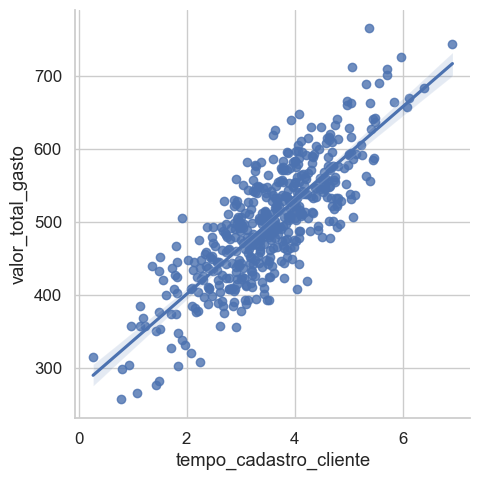

In [21]:
# Plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y = "valor_total_gasto", x = "tempo_cadastro_cliente", data = dados)

In [22]:
# Correlação
dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


A partir do lmplot e do coeficiente de correlação, podemos ver que o tempo de cadstro e o valor total gasto têm uma forte correlação positiva, ou seja, à medida que o cliente se torna mais antigo (mais tempo de cadastro), o valor total gasto por clientes também aumenta.

Outra coisa a se notar é que a sombra ao redor da linha é muito fina, o que significa que os erros entre a estimativa (linha) e os pontos de dados são relativamente pequenos.

### Análise 5 - Relação Entre Tempo Logado na App e Tempo Logado no Web Site

<Figure size 1800x1200 with 0 Axes>

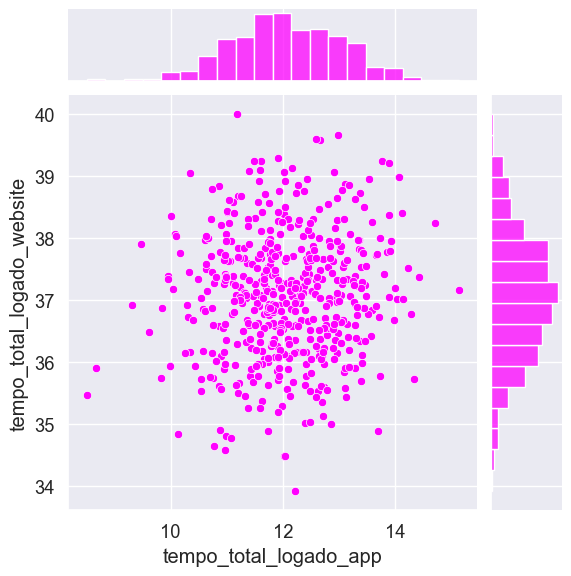

In [23]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, x = 'tempo_total_logado_app', y = 'tempo_total_logado_website', color = 'magenta' )

Não detectamos problemas críticos e podemos seguir adiante. Vamos manter a variável preditora com baixa correlação e validar essa relação com a variável alvo no modelo final.

## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [24]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [25]:
# Variáveis de entrada (variáveis preditoras)
X = dados[['tempo_cadastro_cliente', 
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app', 
           'tempo_total_logado_website']]

In [26]:
# Variável de saída (variável alvo ou target)
y = dados['valor_total_gasto']

In [27]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [28]:
len(X_treino)

350

In [29]:
len(X_teste)

150

### Padronização

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X_treino)

StandardScaler()

In [32]:
X_treino = scaler.transform(X_treino)

In [33]:
X_teste = scaler.transform(X_teste)

In [34]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [35]:
X_teste[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Linear (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

![title](imagens/linear1.png)

![title](imagens/linear2.png)

![title](imagens/linear3.png)

In [36]:
# Cria o modelo
modelo_v1 = LinearRegression()

In [37]:
# Treinamento
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [38]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [39]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


### Avaliação do Modelo

In [40]:
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

In [41]:
# Imprime as 10 primeiras previsões
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

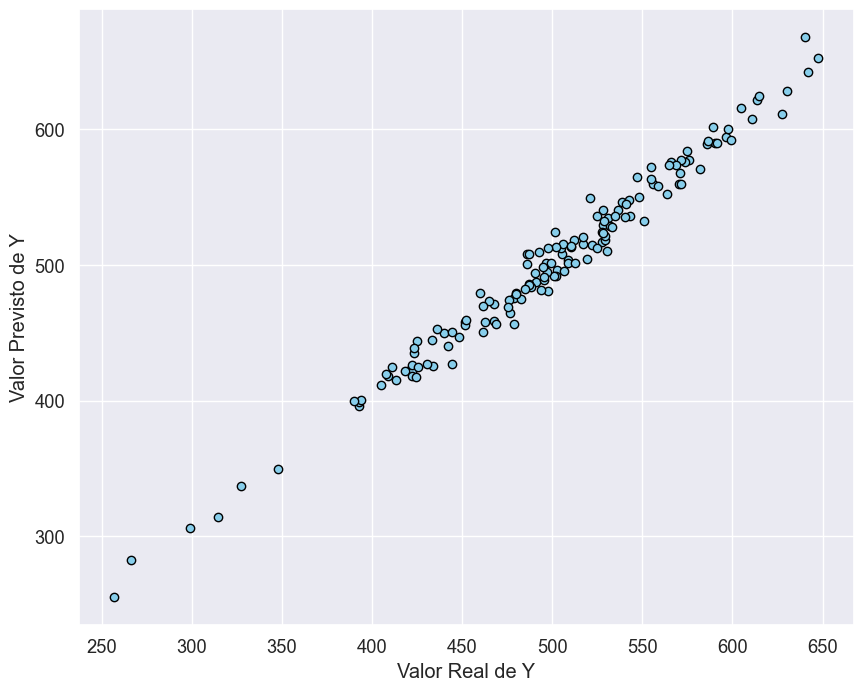

In [42]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

A partir do gráfico de dispersão, podemos ver que há uma correlação muito forte entre os y's previstos e os y's reais nos dados do teste. Isso significa que temos um modelo muito bom.

### Métricas

In [43]:
# Valor médio gasto pelos clientes
dados['valor_total_gasto'].mean()

499.31403826079975

In [44]:
# Valor mínimo
dados['valor_total_gasto'].min()

256.6705823

In [45]:
# Valor máximo
dados['valor_total_gasto'].max()

765.5184619

In [46]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)

7.76241864577898

> O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 7,76 reais, o que é um valor pequeno comparado ao valor médio gasto por cliente.

In [47]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred_v1)

94.95654308438662

In [48]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

9.744564797074656

O RMSE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 9.74, que é um valor pequeno comparado ao valor médio gasto por cliente.

In [49]:
# Coeficiente R2
r2_score(y_teste, pred_v1)

0.9813622791776302

In [50]:
# Variância Explicada
explained_variance_score(y_teste, pred_v1)

0.9817449183428639

Nosso modelo é caapz de explicar 98% da variância dos dados, o que é excelente.

O coeficiente R2 de 98% e as outras métricas, demonstram que este é um modelo muito bom. Será que conseguimos melhorar essa performance?

### Resíduos

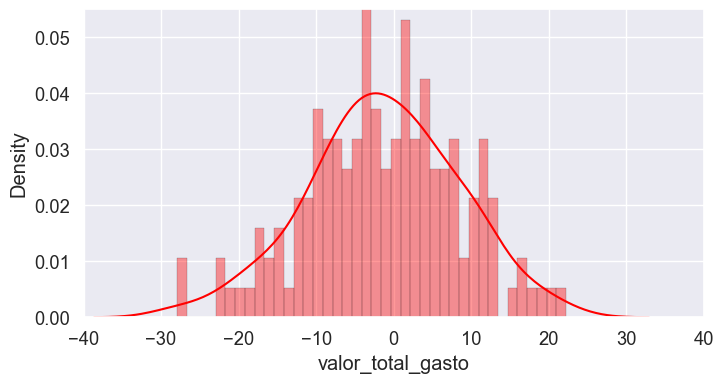

In [51]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

Os resíduos são aproximadamente normalmente distribuídos, o que indica um bom ajuste do modelo. 

###  Construção, Treinamento e Avaliação do Modelo 2 com Regressão Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [52]:
# Cria o modelo
modelo_v2 = Ridge(alpha = 1.0)

In [53]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [54]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [55]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


In [56]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

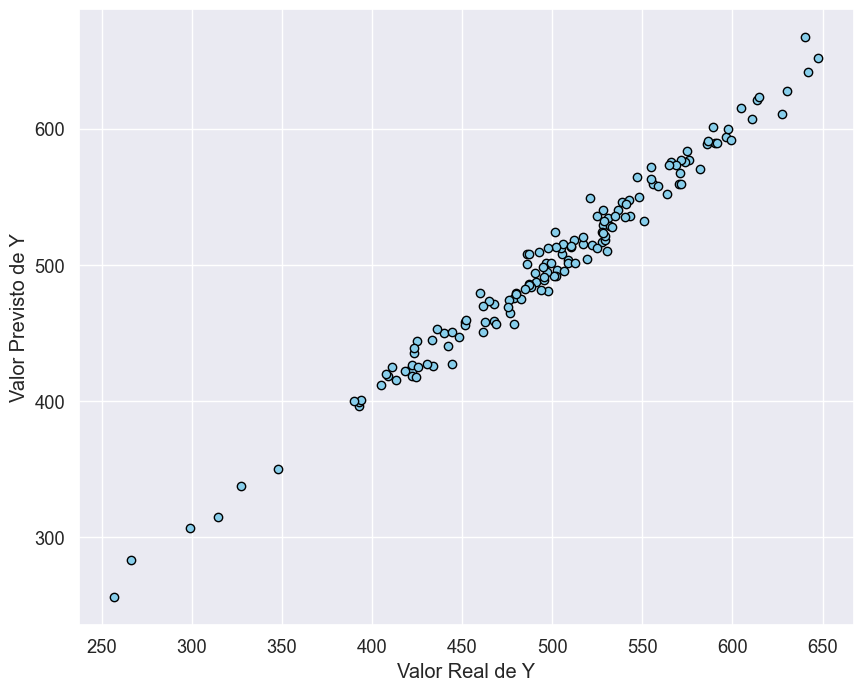

In [57]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [58]:
# MAE
mean_absolute_error(y_teste, pred_v2)

7.764151148981964

In [59]:
# MSE
mean_squared_error(y_teste, pred_v2)

94.93731602493463

In [60]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

9.743578194120198

In [61]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [62]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.9817472659016085

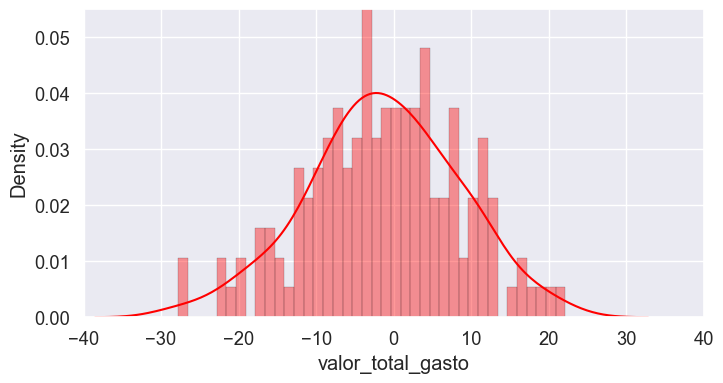

In [63]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

###  Construção, Treinamento e Avaliação do Modelo 3 com Regressão LASSO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [64]:
# Cria o modelo
modelo_v3 = Lasso(alpha = 1.0)

In [65]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [66]:
print('Coeficientes: \n', modelo_v3.coef_)

Coeficientes: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [67]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


In [68]:
# Previsões com dados de teste
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

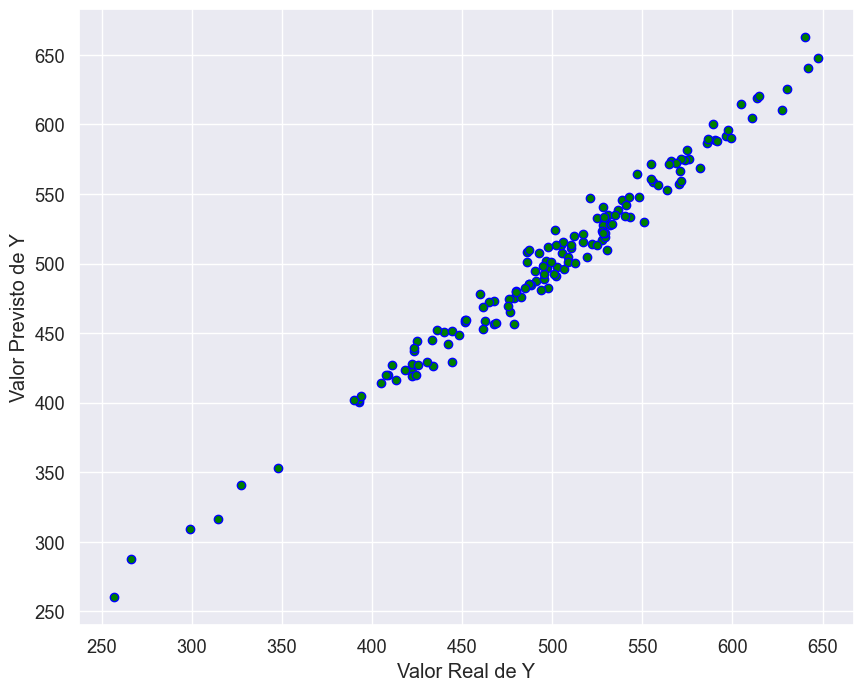

In [69]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [70]:
# MAE
mean_absolute_error(y_teste, pred_v3)

7.788504696951063

In [71]:
# MSE
mean_squared_error(y_teste, pred_v3)

96.05606348970667

In [72]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

9.800819531534426

In [73]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [74]:
# Variância Explicada
explained_variance_score(y_teste, pred_v3)

0.9815600649101045

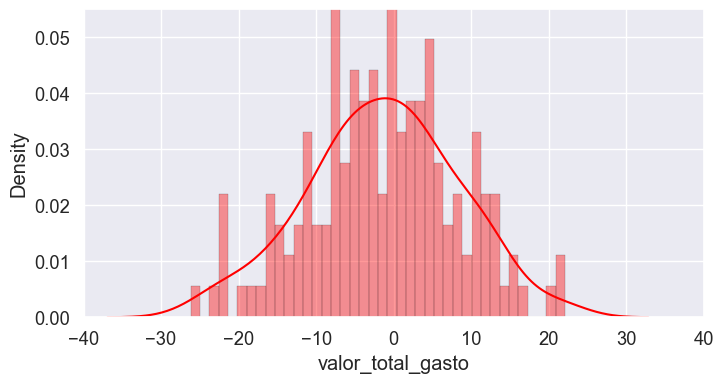

In [75]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v3), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## Seleção do Modelo

O modelo 3 apresentou uma taxa de erro (RMSE) levemente maior e pode ser descartado. Os modelos 1 e 2 ficaram muito próximos e nesse caso devemos escolher o modelo mais simples, que em nosso exemplo é o modelo 1.

## Conclusão

In [76]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [77]:
# Coeficientes
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


#### Interpretações dos Coeficientes:

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63.74 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$ 26.24 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R$ 38.57 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no web site está associado a um aumento de R$ 0.68 no valor total gasto por cliente por mês.

Podemos ver que será mais lucrativo para a empresa investir na atualização da sua app uma vez que o retorno será maior. Além disso, é importante criar políticas para reter o cliente por mais tempo, já que isso também leva ao aumento das vendas. A própria atualização da app será uma forma de reter o cliente por mais tempo.

Não compensa, neste momento, investir na atualização do web site pois o retorno será mínimo.

# Fim